### Importar Librerías

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

### Importar el dataset

In [20]:
data = pd.read_csv('airbnb_bookings.csv', header = 0, skiprows=[2376])
data.shape

(36194, 17)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9924\1039001425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['realSum'])


<AxesSubplot: xlabel='realSum', ylabel='Density'>

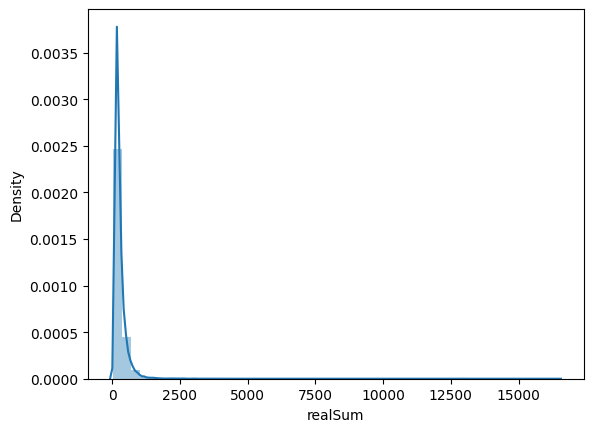

In [21]:
sns.distplot(data['realSum'])

In [22]:
data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,city,day_type
0,210.365854,Entire home/apt,False,False,2,False,0,1,9,91,0,0.541022,0.427919,-9.13395,38.71038,lisbon,weekday
1,176.181721,Private room,False,True,2,False,1,0,9,89,1,3.032839,0.343492,2.14165,41.37011,barcelona,weekday
2,142.054140,Private room,False,True,2,True,0,0,10,98,1,11.909712,6.710909,0.00475,51.44025,london,weekend
3,428.744524,Entire home/apt,False,False,4,False,0,0,9,94,0,4.158390,0.145570,2.30179,48.87297,paris,weekend
4,220.279802,Entire home/apt,False,False,6,True,0,1,10,93,2,1.302190,0.369475,23.72468,37.96746,athens,weekend


In [23]:
data.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
lng                           0
lat                           0
city                          0
day_type                      0
dtype: int64

In [24]:
data.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
lng                           float64
lat                           float64
city                           object
day_type                       object
dtype: object

In [25]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000,36194.000000
mean,279.386846,3.159391,0.293612,0.348980,9.389761,92.614218,1.157595,3.183128,0.676998,7.434832,45.659390
std,328.042369,1.294476,0.455423,0.476654,0.954591,8.917921,0.631141,2.383785,0.848039,9.810969,5.250253
min,39.009259,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.003220,-9.225990,37.953000
25%,148.645200,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.452918,0.247775,-0.071540,41.398830
50%,211.230343,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.607930,0.412522,4.874190,47.506315
75%,319.051960,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,4.251491,0.732341,13.533010,51.469975
max,16445.614690,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,22.617458,13.314115,23.786020,52.641410


In [26]:
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

### Separar el dataset

In [27]:
y = data.loc[:,'realSum']
data.drop(['realSum'],axis=1,inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=20)

### Pipeline 

#### Variables Numericas

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
                            #('imputer', SimpleImputer(strategy="median")),
                            ('std_scaler', StandardScaler()),
                        ])

In [30]:
df_num_tr = num_pipeline.fit_transform(data.select_dtypes(include='number'))
df_num_tr[0,:]

array([-0.89565733, -0.64471156,  1.3658293 , -0.40830698, -0.18101082,
       -1.83415651, -1.10838108, -0.29371493, -1.68882511, -1.32357536])

#### Variables categoricas

In [31]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
                        #('imputer', SimpleImputer(strategy="most_frequent")),
                        ('oh_enc', OneHotEncoder()),
                        ])

In [32]:
# test categorical pipeline
# --------------------------
df_cat_tr = cat_pipeline.fit_transform(data.select_dtypes(exclude='number'))

# review output from pipeline
df_cat_tr.toarray()[0,:]

array([1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0.])

#### Pipeline Completo

In [33]:
from sklearn.compose import ColumnTransformer

num_attribs = data.select_dtypes(include='number').columns
cat_attribs = data.select_dtypes(exclude='number').columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [34]:
full_pipeline.fit(data)
X_train_processed = full_pipeline.transform(X_train)
#X_train_processed = full_pipeline.fit_transform(X_train)

print(X_train_processed.shape)

X_train_processed[0,:]

(25335, 31)


array([-0.89565733, -0.64471156,  1.3658293 , -0.40830698,  0.0432598 ,
       -0.24970234, -0.8004245 , -0.32494498, -1.6901828 , -1.32132782,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

In [35]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
"""
X = sm.add_constant(X_train_processed)

simple_model = sm.OLS(y_train, X)

simple_result = simple_model.fit();
""" 

poly_reg = PolynomialFeatures(degree = 5)


X_poly_train = poly_reg.fit_transform(X_train_processed)
X_poly_test = poly_reg.fit_transform(X_train_processed)

# create instance
#forest_clf = RandomForestClassifier(random_state=42)

#forest_clf.fit(X_train_processed[:6000], y_train[:6000])

MemoryError: Unable to allocate 71.2 GiB for an array with shape (25335, 376992) and data type float64

In [17]:
print(simple_result.summary())

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     375.7
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:12:34   Log-Likelihood:            -1.7757e+05
No. Observations:               25335   AIC:                         3.552e+05
Df Residuals:                   25311   BIC:                         3.554e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.45e+12   1.43e+14     -0.038      0.9